In [10]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# importing data 
df = pd.read_csv('diabetes.csv') 

print(df.head()) 
print(df.columns)

        age       sex       bmi       map        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu    y  
0 -0.002592  0.019908 -0.017646  151  
1 -0.039493 -0.068330 -0.092204   75  
2 -0.002592  0.002864 -0.025930  141  
3  0.034309  0.022692 -0.009362  206  
4 -0.002592 -0.031991 -0.046641  135  
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')


In [12]:
# creating feature variables 
X = df.drop('y',axis= 1) 
y = df['y'] 
print(X) 
print(y)

          age       sex       bmi       map        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

In [13]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size=0.3, random_state=101) 

# creating a regression model 
model = LinearRegression() 

model.fit(X_train,y_train)


LinearRegression()

In [14]:
# Predict on test set
y_pred_test = model.predict(X_test)

# Predict on training set for evaluation
y_pred_train = model.predict(X_train)

In [15]:
# Calculate training metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Data Metrics:")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"Mean Absolute Error: {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}")


Training Data Metrics:
Mean Squared Error: 2701.0141
Mean Absolute Error: 42.2334
R² Score: 0.5342


In [16]:
# Calculate test metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Data Metrics:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Test Data Metrics:
Mean Squared Error: 3365.0760
Mean Absolute Error: 46.0220
R² Score: 0.4577


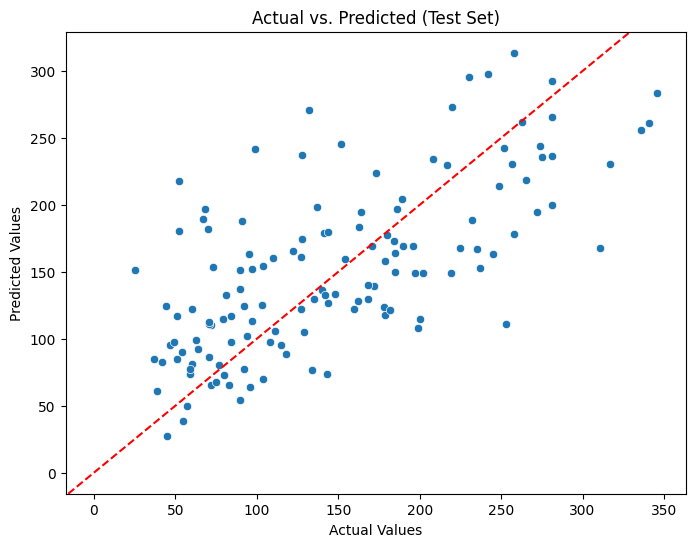

In [18]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()